<a href="https://colab.research.google.com/github/renatampr/RNA-e-Deep-Learning---CESAR-School-2024.01/blob/main/RENATA_ATIV_3_4_LogisticRegressionMNIST_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [7]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [8]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

dataset_train

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 43.0MB/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.27MB/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.9MB/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.22MB/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
print(dataset_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [10]:
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)


In [11]:
len(loader_train)

600

In [12]:

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [13]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [14]:
model = torch.nn.Linear(28*28, 10)

In [15]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.2183,  0.6080, -0.3521,  0.1556,  0.2615,  0.0613, -0.3610, -0.3811,
          0.6936,  0.3590]], grad_fn=<AddmmBackward0>)

In [16]:
x, _ = dataset_train[0]
x = x.view(-1, 28 * 28)
predict = model(x)
predict

tensor([[ 0.0796, -0.0586, -0.0695,  0.1375,  0.0146,  0.3009, -0.0749, -0.2514,
          0.2569, -0.1273]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [17]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [18]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for data in loader_train:
        (x_train, y_train) = data
        # Transforma a entrada para uma dimensão

        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [20]:
print('Final loss:', loss.data)

Final loss: tensor(0.3289)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

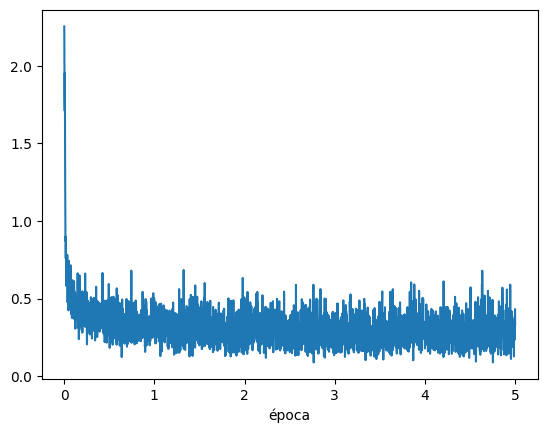

In [21]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

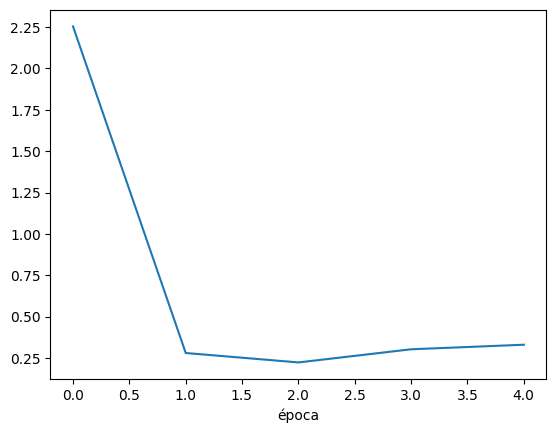

In [22]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
R.: 100
2. Em uma época, quantos mini-batches existem?
R.: 600
3. Qual é a definição de época?
R.: Um ciclo, loop, onde todas as amostras da base de dados são avaliadas pelo modelo, seja diretamente ou em mini-batches. E após o cálculo da perda, os pesos da rede são atualizados.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [23]:
# Exercício 1

epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print('Época: {}/{}, batch: {}'.format(i+1, n_epochs, k))

Época: 1/5, batch: 0
Época: 1/5, batch: 1
Época: 1/5, batch: 2
Época: 1/5, batch: 3
Época: 1/5, batch: 4
Época: 1/5, batch: 5
Época: 1/5, batch: 6
Época: 1/5, batch: 7
Época: 1/5, batch: 8
Época: 1/5, batch: 9
Época: 1/5, batch: 10
Época: 1/5, batch: 11
Época: 1/5, batch: 12
Época: 1/5, batch: 13
Época: 1/5, batch: 14
Época: 1/5, batch: 15
Época: 1/5, batch: 16
Época: 1/5, batch: 17
Época: 1/5, batch: 18
Época: 1/5, batch: 19
Época: 1/5, batch: 20
Época: 1/5, batch: 21
Época: 1/5, batch: 22
Época: 1/5, batch: 23
Época: 1/5, batch: 24
Época: 1/5, batch: 25
Época: 1/5, batch: 26
Época: 1/5, batch: 27
Época: 1/5, batch: 28
Época: 1/5, batch: 29
Época: 1/5, batch: 30
Época: 1/5, batch: 31
Época: 1/5, batch: 32
Época: 1/5, batch: 33
Época: 1/5, batch: 34
Época: 1/5, batch: 35
Época: 1/5, batch: 36
Época: 1/5, batch: 37
Época: 1/5, batch: 38
Época: 1/5, batch: 39
Época: 1/5, batch: 40
Época: 1/5, batch: 41
Época: 1/5, batch: 42
Época: 1/5, batch: 43
Época: 1/5, batch: 44
Época: 1/5, batch: 4

In [25]:
loader_train = DataLoader(dataset_train, batch_size=200, shuffle=True)


model = torch.nn.Linear(28*28, 10)

n_epochs = 5
learningRate = 0.5

criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)


In [27]:
print('Final loss:', loss.data)



Final loss: tensor(0.2183)


Text(0.5, 0, 'época')

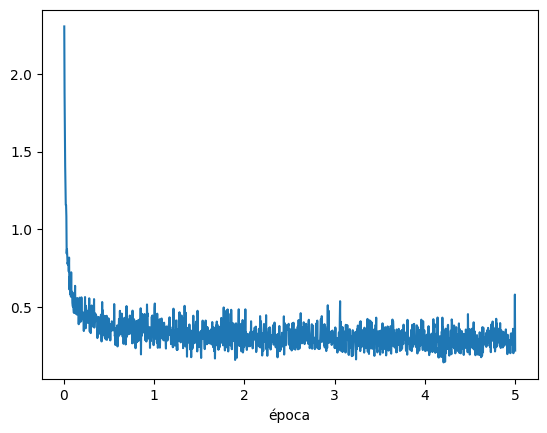

In [28]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

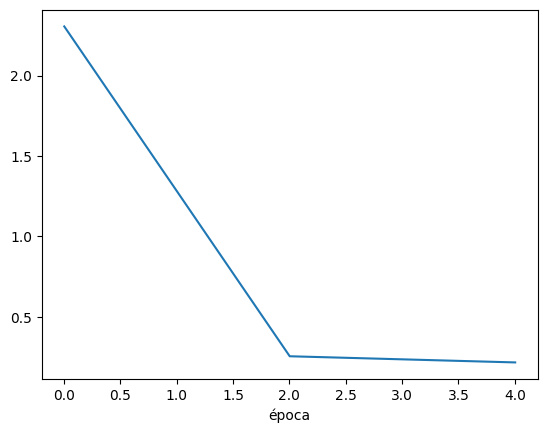

In [29]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

## Conclusões sobre os experimentos deste notebook
